In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: '../styles/tma4215.css'

In [1]:
import numpy as np
import scipy.interpolate as ip
import matplotlib.pyplot as plt

## Problem 2

In this problem, you are asked to estimate the Lebesgue constant for function interpolation. Given a set of nodes $x_0,\ldots x_n\in[a,b]$, the Lebesgue constant $\Lambda_n$ is defined as 

$$ \Lambda_n := \max_{x\in[a,b]} L(x) $$

where

$$ L(x) = \sum_{i=1}^n |L_{i,n}(x)|. $$

Here, $L_{i,n}(x)$ is the Lagrange polynomial number $i$, given by

$$ L_{i,n}(x) = \prod_{j\neq i} \frac{x-x_j}{x_i-x_j}. $$

Using the Lebesgue constant, we can obtain an upper bound for the interpolation error relative to the best interpolation error. Assume that $p$ is some interpolating polynomial and $p^\ast$ is the best interpolating polynomial. Then we have that

$$ \|p-f\| \leq (\Lambda_n+1) \|p^\ast-f\|. $$

Note that this holds for every norm $\|\cdot\|$.

**a)**

Write a function which computes $L(x)$, given a set of nodes $x_0,\ldots x_n$.

In [2]:
def L(x, x_nodes):
    res = 0
    L_in = 1
    n = len(x_nodes)
    for i in range(0,n):
        for j in range(0,n):
            if (j != i):
                L_in = L_in*(x-x_nodes[j])/(x_nodes[i]-x_nodes[j])
        res = res + abs(L_in)
        L_in = 1
    return res    


We want to estimate $\Lambda_n$ for nodes on the interval $[-1,1]$. Spesifically we want to consider

- Uniformly distributed nodes:  $x_i = -1+2i/n, \ i=0,\ldots n$
- Chebyshev nodes: $x_i = \cos\left(\pi\frac{2i+1}{2n+2}\right), \ i=0,\ldots n$


**b)**

Plot $L(x)$ for $x\in[-1,1]$ and give an estimate for $\Lambda_n$ for $n=5,10,15,20$ for using 

- Uniformly distributed nodes.
- Chebyshev nodes.

What do you observe? Do you expect uniformly distributed nodes or Chebyshev nodes to give a better interpolating polynomial?

*Hint: When estimating $\Lambda_n$, you can construct a very fine grid of values of $x$'s, compute $L(x)$ for each $x$ and find the maximum of all values of $L(x)$.* 

*If you prefer, you may use the following template:*

In [3]:
import math as m

def uni(n):
    nodes = np.zeros(n+1)
    for i in range(n+1):
        nodes[i] = -1+(2*i/n)
    return nodes

def cheb(n):
    nodes = np.zeros(n+1)
    for i in range(n+1):
        nodes[i] = m.cos(m.pi*(2*i+1)/(2*n+2))
    return nodes

print(uni(5))

[-1.  -0.6 -0.2  0.2  0.6  1. ]


Estimate Lambda for Chebyshev distribution with 5 nodes: 2.1043976826464865
Estimate Lambda for Chebyshev distribution with 10 nodes: 2.4894303768819768
Estimate Lambda for Chebyshev distribution with 15 nodes: 2.7277779364183505
Estimate Lambda for Chebyshev distribution with 20 nodes: 2.9008249044468974
Estimate Lambda for uniform distribution with 5 nodes: 3.106301040275435
Estimate Lambda for uniform distribution with 10 nodes: 29.899952915478508
Estimate Lambda for uniform distribution with 15 nodes: 512.3500073449096
Estimate Lambda for uniform distribution with 20 nodes: 10986.653827596603


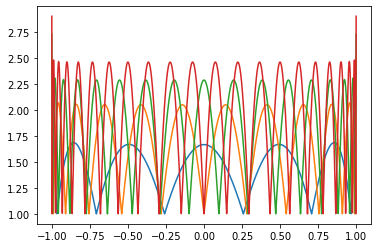

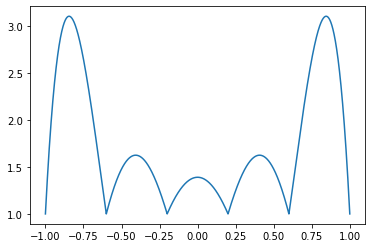

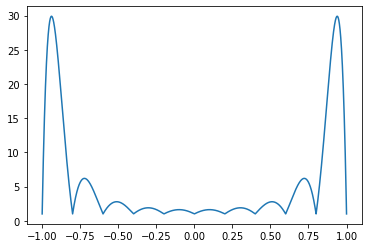

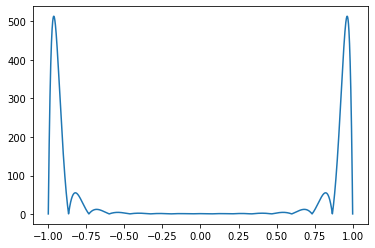

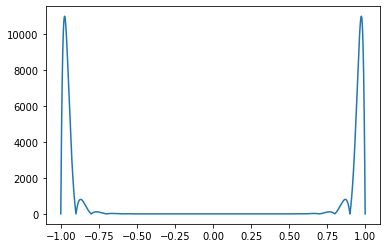

In [31]:
# Compute a fine grid of x's:
x_vec = np.linspace(-1,1,10000)


# Construct a placeholder for the values of L(x)
L_vec = np.zeros(x_vec.shape)


# Compute L(x) for all x in x_vec and store the values of L in L_vec.
# For example: L_vec[i] = L(x_vec[i], x_nodes)
# ...

def plot_uni(n):
    for i in range(len(L_vec)):
        L_vec[i]=L(x_vec[i], uni(n))
    Lambda_n_estimate = np.max(L_vec)
    print('Estimate Lambda for uniform distribution with ' + str(n) + ' nodes: '+ str(Lambda_n_estimate))
    plt.figure()
    U = plt.plot(x_vec,L_vec)

def plot_cheb(n):
    for i in range(len(L_vec)):
        L_vec[i]=L(x_vec[i], cheb(n))
    Lambda_n_estimate = np.max(L_vec)
    print('Estimate Lambda for Chebyshev distribution with ' + str(n) + ' nodes: '+ str(Lambda_n_estimate))
    plt.plot(x_vec,L_vec)

plot_cheb(5)
plot_cheb(10)
plot_cheb(15)
plot_cheb(20)
plot_uni(5)
plot_uni(10)
plot_uni(15)
plot_uni(20)

    

# Lambda_n_estimate will now approximate the true value of Chebyshev's constant
Lambda_n_estimate = np.max(L_vec)

<font color ='blue'>
    Your comments here: </font>
    You can observe that the Lebesgue Constant $\lambda$ seems to be unlimited with the uniformerly distributed nodes because the "end points" tend to be very high. With the Chebyshev nodes, there seems to be a limit (at about 3). 
    Now consider the mentioned inequation $ \|p-f\| \leq (\Lambda_n+1) \|p^\ast-f\|. $ If the Lebesgue Constant is very high as is the case for the uniformely distributed nodes, this will lead to a rather inadequate upper bound. Therfore the Chebyshev nodes offer a better interpolating polynomial.
